# 🎮 Rainbow Six Siege - Analyse Exploratoire des Données

---

## 📋 Table des matières

1. [Introduction](#introduction)
2. [Configuration et imports](#imports)
3. [Chargement des données](#chargement)
4. [Exploration initiale](#exploration)
5. [Analyse des colonnes](#colonnes)
6. [Qualité des données](#qualite)
7. [Analyses statistiques](#stats)
8. [Visualisations](#viz)
9. [Conclusions et recommandations](#conclusions)

---

## 1️⃣ Introduction {#introduction}

### 🎯 Objectifs de cette analyse

Ce notebook a pour but d'explorer le dataset **Rainbow Six Siege Season 5 Ranked** afin de :

- ✅ Comprendre la structure des données
- ✅ Identifier les colonnes disponibles et leur signification
- ✅ Détecter les valeurs manquantes ou aberrantes
- ✅ Visualiser les distributions et corrélations
- ✅ Préparer le nettoyage des données

### 📊 Source des données

- **Dataset** : [Kaggle - Rainbow Six Siege S5 Ranked Dataset](https://www.kaggle.com/datasets/maxcobra/rainbow-six-siege-s5-ranked-dataset)
- **Taille** : ~20 G
- **Format** : CSV
- **Période** : Saison 5 (Ranked)

---


## 2️⃣ CONFIGURATION ET IMPORTS


In [3]:

# 📚 Bibliothèques de manipulation de données
import pandas as pd
import numpy as np
from pathlib import Path
import os

# 📊 Bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# ⚙️ Configuration de l'affichage
pd.set_option('display.max_columns', None)      # Afficher toutes les colonnes
pd.set_option('display.max_rows', 100)          # Afficher jusqu'à 100 lignes
pd.set_option('display.float_format', '{:.2f}'.format)  # Format des nombres

# 🎨 Configuration des graphiques
sns.set_style("whitegrid")                      # Style des graphiques
plt.rcParams['figure.figsize'] = (14, 7)        # Taille par défaut des figures
plt.rcParams['font.size'] = 11                  # Taille de la police
warnings.filterwarnings('ignore')               # Ignorer les warnings

# 🎨 Palette de couleurs personnalisée (couleurs R6 Siege)
COLORS = {
    'primary': '#F9A825',      # Jaune/Or R6
    'secondary': '#2E3B55',    # Bleu foncé
    'success': '#4CAF50',      # Vert
    'danger': '#E53935',       # Rouge
    'info': '#1E88E5'          # Bleu
}

print("✅ Configuration terminée")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ Configuration terminée
📦 Pandas version: 2.2.2
📦 NumPy version: 1.26.4


---

## 3️⃣ Chargement des données {#chargement}

Dans cette section, nous chargeons le dataset et effectuons une première inspection.

In [4]:
# ═══════════════════════════════════════════════════════════════════════════
# 📥 CHARGEMENT DU DATASET
# ═══════════════════════════════════════════════════════════════════════════

# 📁 Définir le chemin vers les données
raw_path = Path("../data/raw")

# 🔍 Lister tous les fichiers CSV disponibles
csv_files = list(raw_path.glob("*.csv"))

print("="*80)
print(f"📊 FICHIERS CSV DISPONIBLES ({len(csv_files)} fichier(s))")
print("="*80)

for i, file in enumerate(csv_files, 1):
    size_mb = file.stat().st_size / (1024**2)
    print(f"{i}. 📄 {file.name:<40} | Taille: {size_mb:>8.2f} MB")

print("="*80)

📊 FICHIERS CSV DISPONIBLES (22 fichier(s))
1. 📄 datadump_s5-000.csv                      | Taille:   896.64 MB
2. 📄 datadump_s5-001.csv                      | Taille:   895.71 MB
3. 📄 datadump_s5-002.csv                      | Taille:   897.47 MB
4. 📄 datadump_s5-003.csv                      | Taille:   895.46 MB
5. 📄 datadump_s5-004.csv                      | Taille:   896.16 MB
6. 📄 datadump_s5-005.csv                      | Taille:   896.27 MB
7. 📄 datadump_s5-006.csv                      | Taille:   896.55 MB
8. 📄 datadump_s5-007.csv                      | Taille:   896.97 MB
9. 📄 datadump_s5-008.csv                      | Taille:   896.83 MB
10. 📄 datadump_s5-009.csv                      | Taille:   895.49 MB
11. 📄 datadump_s5-010.csv                      | Taille:   895.85 MB
12. 📄 datadump_s5-011.csv                      | Taille:   896.09 MB
13. 📄 datadump_s5-012.csv                      | Taille:   897.34 MB
14. 📄 datadump_s5-013.csv                      | Taille:   896.19 MB


In [5]:
# ═══════════════════════════════════════════════════════════════════════════
# 📦 CHARGEMENT D'UN ÉCHANTILLON
# ═══════════════════════════════════════════════════════════════════════════

# ⚙️ Configuration du chargement
SAMPLE_SIZE = 100000  # Nombre de lignes à charger (pour ne pas saturer la RAM)

print(f"⏳ Chargement de {SAMPLE_SIZE:,} lignes...")

# 📥 Charger le dataset
df = pd.read_csv(csv_files[0], nrows=SAMPLE_SIZE)

# 📊 Informations sur le chargement
memory_usage = df.memory_usage(deep=True).sum() / (1024**2)

print("\n" + "="*80)
print("✅ CHARGEMENT RÉUSSI")
print("="*80)
print(f"📏 Dimensions        : {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f"💾 Mémoire utilisée  : {memory_usage:.2f} MB")
print(f"📅 Période analysée  : {SAMPLE_SIZE:,} premières lignes")
print("="*80)

⏳ Chargement de 100,000 lignes...

✅ CHARGEMENT RÉUSSI
📏 Dimensions        : 100,000 lignes × 31 colonnes
💾 Mémoire utilisée  : 117.03 MB
📅 Période analysée  : 100,000 premières lignes


---

## 4️⃣ Exploration initiale {#exploration}

Première inspection du dataset pour comprendre sa structure.

In [6]:
# ═══════════════════════════════════════════════════════════════════════════
# 👀 APERÇU DES DONNÉES
# ═══════════════════════════════════════════════════════════════════════════

print("📋 Aperçu des 10 premières lignes:\n")
df.head(10)

📋 Aperçu des 10 premières lignes:



,dateid,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,clearancelevel,skillrank,role,team,haswon,operator,nbkills,isdead,primaryweapon,primaryweapontype,primarysight,primarygrip,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget
0,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,1,STRIP_CLUB,Defender,AttackersKilledHostage,124,64,Gold,Defender,1,1,SWAT-CASTLE,0,0,UMP45,Submachine_Guns,RedDot,Vertical,NaN,Compensator,5.7_USG,Pistols,NaN,NaN,NaN,NaN,IMPACT_GRENADE
1,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,81,Gold,Defender,0,1,GSG9-JAGER,0,1,416-C_CARBINE,Assault_Rifles,RedDot,Vertical,Laser,Suppressor,P12,Pistols,NaN,NaN,Laser,Suppressor,DEPLOYABLE_SHIELD
2,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,150,Gold,Defender,1,1,JTF2-FROST,0,0,9mm_C1,Submachine_Guns,Reflex,NaN,NaN,NaN,MK1_9mm,Pistols,NaN,NaN,NaN,NaN,DEPLOYABLE_SHIELD
3,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,94,Gold,Defender,0,1,BOPE-CAVEIRA,3,0,M12,Submachine_Guns,RedDot,NaN,NaN,MuzzleBrake,PRB92,Pistols,NaN,NaN,NaN,NaN,IMPACT_GRENADE
4,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,81,Gold,Defender,0,0,GSG9-JAGER,0,1,416-C_CARBINE,Assault_Rifles,RedDot,Vertical,Laser,Suppressor,P12,Pistols,NaN,NaN,Laser,Suppressor,DEPLOYABLE_SHIELD
5,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,2,CHURCH,Attacker,DefendersEliminated,129,81,Gold,Defender,0,0,GSG9-JAGER,0,1,416-C_CARBINE,Assault_Rifles,RedDot,Vertical,Laser,Suppressor,P12,Pistols,NaN,NaN,Laser,Suppressor,DEPLOYABLE_SHIELD
6,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,5,CASH_ROOM,Attacker,DefendersEliminated,175,120,Gold,Attacker,0,1,G.E.O.-JACKAL,2,0,C7E,Assault_Rifles,Acog,Vertical,NaN,MuzzleBrake,ITA12S,Shotguns,Reflex,NaN,Laser,NaN,BREACH_CHARGE
7,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,83,Gold,Defender,1,1,GSG9-JAGER,1,0,416-C_CARBINE,Assault_Rifles,Acog,Vertical,NaN,MuzzleBrake,P12,Pistols,NaN,NaN,NaN,NaN,DEPLOYABLE_SHIELD
8,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,1,STRIP_CLUB,Defender,AttackersKilledHostage,124,120,Gold,Attacker,0,0,GIGN-TWITCH,0,1,F2,Assault_Rifles,Acog,Vertical,NaN,Compensator,P9,Pistols,NaN,NaN,NaN,MuzzleBrake,BREACH_CHARGE
9,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,64,Gold,Attacker,1,1,SWAT-ASH,1,0,R4-C,Assault_Rifles,Acog,Vertical,NaN,Compensator,5.7_USG,Pistols,NaN,NaN,NaN,NaN,BREACH_CHARGE


In [7]:
# ═══════════════════════════════════════════════════════════════════════════
# 🔍 INFORMATIONS SUR LES COLONNES
# ═══════════════════════════════════════════════════════════════════════════

print("📊 Informations détaillées sur le dataset:\n")
df.info()

📊 Informations détaillées sur le dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   dateid                100000 non-null  int64 
 1   platform              100000 non-null  object
 2   gamemode              100000 non-null  object
 3   mapname               100000 non-null  object
 4   matchid               100000 non-null  int64 
 5   roundnumber           100000 non-null  int64 
 6   objectivelocation     100000 non-null  object
 7   winrole               100000 non-null  object
 8   endroundreason        100000 non-null  object
 9   roundduration         100000 non-null  int64 
 10  clearancelevel        100000 non-null  int64 
 11  skillrank             100000 non-null  object
 12  role                  100000 non-null  object
 13  team                  100000 non-null  int64 
 14  haswon                1000

In [8]:
# ═══════════════════════════════════════════════════════════════════════════
# 📝 LISTE DES COLONNES DISPONIBLES
# ═══════════════════════════════════════════════════════════════════════════

print("="*80)
print(f"📂 COLONNES DISPONIBLES ({len(df.columns)} colonnes)")
print("="*80)

for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    non_null = df[col].count()
    null_count = df[col].isnull().sum()
    
    # 🎨 Icône selon le type
    if dtype == 'object':
        icon = "📝"
    elif dtype in ['int64', 'float64']:
        icon = "🔢"
    else:
        icon = "❓"
    
    print(f"{i:2d}. {icon} {col:<30} | Type: {str(dtype):<10} | Non-null: {non_null:>7,} | Null: {null_count:>6,}")

print("="*80)

📂 COLONNES DISPONIBLES (31 colonnes)
 1. 🔢 dateid                         | Type: int64      | Non-null: 100,000 | Null:      0
 2. 📝 platform                       | Type: object     | Non-null: 100,000 | Null:      0
 3. 📝 gamemode                       | Type: object     | Non-null: 100,000 | Null:      0
 4. 📝 mapname                        | Type: object     | Non-null: 100,000 | Null:      0
 5. 🔢 matchid                        | Type: int64      | Non-null: 100,000 | Null:      0
 6. 🔢 roundnumber                    | Type: int64      | Non-null: 100,000 | Null:      0
 7. 📝 objectivelocation              | Type: object     | Non-null: 100,000 | Null:      0
 8. 📝 winrole                        | Type: object     | Non-null: 100,000 | Null:      0
 9. 📝 endroundreason                 | Type: object     | Non-null: 100,000 | Null:      0
10. 🔢 roundduration                  | Type: int64      | Non-null: 100,000 | Null:      0
11. 🔢 clearancelevel                 | Type: int64   

---

## 5️⃣ Analyse des colonnes {#colonnes}

Analyse détaillée des différents types de colonnes.

In [9]:
# ═══════════════════════════════════════════════════════════════════════════
# 🔢 ANALYSE DES COLONNES NUMÉRIQUES
# ═══════════════════════════════════════════════════════════════════════════

# 🔍 Identifier les colonnes numériques
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("="*80)
print(f"🔢 COLONNES NUMÉRIQUES ({len(num_cols)} colonnes)")
print("="*80)

for col in num_cols:
    print(f"\n📊 {col}")
    print(f"   ├─ Min    : {df[col].min()}")
    print(f"   ├─ Max    : {df[col].max()}")
    print(f"   ├─ Moyenne: {df[col].mean():.2f}")
    print(f"   ├─ Médiane: {df[col].median():.2f}")
    print(f"   └─ Écart-type: {df[col].std():.2f}")

print("="*80)

🔢 COLONNES NUMÉRIQUES (9 colonnes)

📊 dateid
   ├─ Min    : 20170212
   ├─ Max    : 20170212
   ├─ Moyenne: 20170212.00
   ├─ Médiane: 20170212.00
   └─ Écart-type: 0.00

📊 matchid
   ├─ Min    : 1522380841
   ├─ Max    : 1817583741
   ├─ Moyenne: 1672892610.20
   ├─ Médiane: 1673411641.00
   └─ Écart-type: 86370592.98

📊 roundnumber
   ├─ Min    : 1
   ├─ Max    : 9
   ├─ Moyenne: 3.52
   ├─ Médiane: 3.00
   └─ Écart-type: 2.00

📊 roundduration
   ├─ Min    : 6
   ├─ Max    : 2538
   ├─ Moyenne: 185.73
   ├─ Médiane: 188.00
   └─ Écart-type: 46.48

📊 clearancelevel
   ├─ Min    : 0
   ├─ Max    : 331
   ├─ Moyenne: 92.64
   ├─ Médiane: 89.00
   └─ Écart-type: 46.08

📊 team
   ├─ Min    : 0
   ├─ Max    : 1
   ├─ Moyenne: 0.50
   ├─ Médiane: 0.00
   └─ Écart-type: 0.50

📊 haswon
   ├─ Min    : 0
   ├─ Max    : 1
   ├─ Moyenne: 0.51
   ├─ Médiane: 1.00
   └─ Écart-type: 0.50

📊 nbkills
   ├─ Min    : 0
   ├─ Max    : 6
   ├─ Moyenne: 0.70
   ├─ Médiane: 0.00
   └─ Écart-type: 0.92

📊 is

In [10]:
# ═══════════════════════════════════════════════════════════════════════════
# 📂 ANALYSE DES COLONNES CATÉGORIELLES
# ═══════════════════════════════════════════════════════════════════════════

# 🔍 Identifier les colonnes catégorielles
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("="*80)
print(f"📂 COLONNES CATÉGORIELLES ({len(cat_cols)} colonnes)")
print("="*80)

for col in cat_cols:
    n_unique = df[col].nunique()
    top_value = df[col].value_counts().index[0]
    top_count = df[col].value_counts().values[0]
    top_pct = (top_count / len(df)) * 100
    
    print(f"\n📝 {col}")
    print(f"   ├─ Valeurs uniques: {n_unique}")
    print(f"   ├─ Valeur la plus fréquente: '{top_value}'")
    print(f"   └─ Fréquence: {top_count:,} ({top_pct:.2f}%)")
    
    # Afficher les top 5 valeurs pour les colonnes avec peu de modalités
    if n_unique <= 20:
        print(f"\n   📊 Top 5 des valeurs:")
        for val, count in df[col].value_counts().head(5).items():
            pct = (count / len(df)) * 100
            print(f"      • {val}: {count:,} ({pct:.2f}%)")

print("="*80)

📂 COLONNES CATÉGORIELLES (22 colonnes)

📝 platform
   ├─ Valeurs uniques: 3
   ├─ Valeur la plus fréquente: 'PS4'
   └─ Fréquence: 46,180 (46.18%)

   📊 Top 5 des valeurs:
      • PS4: 46,180 (46.18%)
      • XONE: 38,781 (38.78%)
      • PC: 15,039 (15.04%)

📝 gamemode
   ├─ Valeurs uniques: 3
   ├─ Valeur la plus fréquente: 'SECURE_AREA'
   └─ Fréquence: 61,824 (61.82%)

   📊 Top 5 des valeurs:
      • SECURE_AREA: 61,824 (61.82%)
      • BOMB: 26,257 (26.26%)
      • HOSTAGE: 11,919 (11.92%)

📝 mapname
   ├─ Valeurs uniques: 16
   ├─ Valeur la plus fréquente: 'HOUSE'
   └─ Fréquence: 7,183 (7.18%)

   📊 Top 5 des valeurs:
      • HOUSE: 7,183 (7.18%)
      • PLANE: 7,048 (7.05%)
      • YACHT: 6,962 (6.96%)
      • BORDER: 6,892 (6.89%)
      • SKYSCRAPER: 6,794 (6.79%)

📝 objectivelocation
   ├─ Valeurs uniques: 142
   ├─ Valeur la plus fréquente: 'GARAGE'
   └─ Fréquence: 4,503 (4.50%)

📝 winrole
   ├─ Valeurs uniques: 2
   ├─ Valeur la plus fréquente: 'Defender'
   └─ Fréquence: 

---

## 6️⃣ Qualité des données {#qualite}

Vérification de la qualité des données (valeurs manquantes, doublons, etc.)

In [11]:
# ═══════════════════════════════════════════════════════════════════════════
# ❓ ANALYSE DES VALEURS MANQUANTES
# ═══════════════════════════════════════════════════════════════════════════

# 🔍 Calculer les valeurs manquantes
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

# 📊 Créer un DataFrame récapitulatif
missing_df = pd.DataFrame({
    'Colonne': df.columns,
    'Valeurs_manquantes': missing.values,
    'Pourcentage': missing_pct.values
}).sort_values('Valeurs_manquantes', ascending=False)

# Filtrer uniquement les colonnes avec des valeurs manquantes
missing_df_filtered = missing_df[missing_df['Valeurs_manquantes'] > 0]

print("="*80)
print("❓ VALEURS MANQUANTES")
print("="*80)

if len(missing_df_filtered) > 0:
    print(f"\n⚠️  {len(missing_df_filtered)} colonne(s) avec des valeurs manquantes:\n")
    print(missing_df_filtered.to_string(index=False))
else:
    print("\n✅ Aucune valeur manquante détectée !")

print("\n" + "="*80)
print(f"📊 Résumé: {missing.sum():,} valeurs manquantes au total ({(missing.sum() / df.size * 100):.2f}% du dataset)")
print("="*80)

❓ VALEURS MANQUANTES

⚠️  8 colonne(s) avec des valeurs manquantes:

             Colonne  Valeurs_manquantes  Pourcentage
       secondarygrip               94236        94.24
      secondarysight               84946        84.95
  primaryunderbarrel               84290        84.29
secondaryunderbarrel               81960        81.96
     secondarybarrel               62441        62.44
         primarygrip               30535        30.54
       primarybarrel               18655        18.66
        primarysight                7849         7.85

📊 Résumé: 464,912 valeurs manquantes au total (15.00% du dataset)


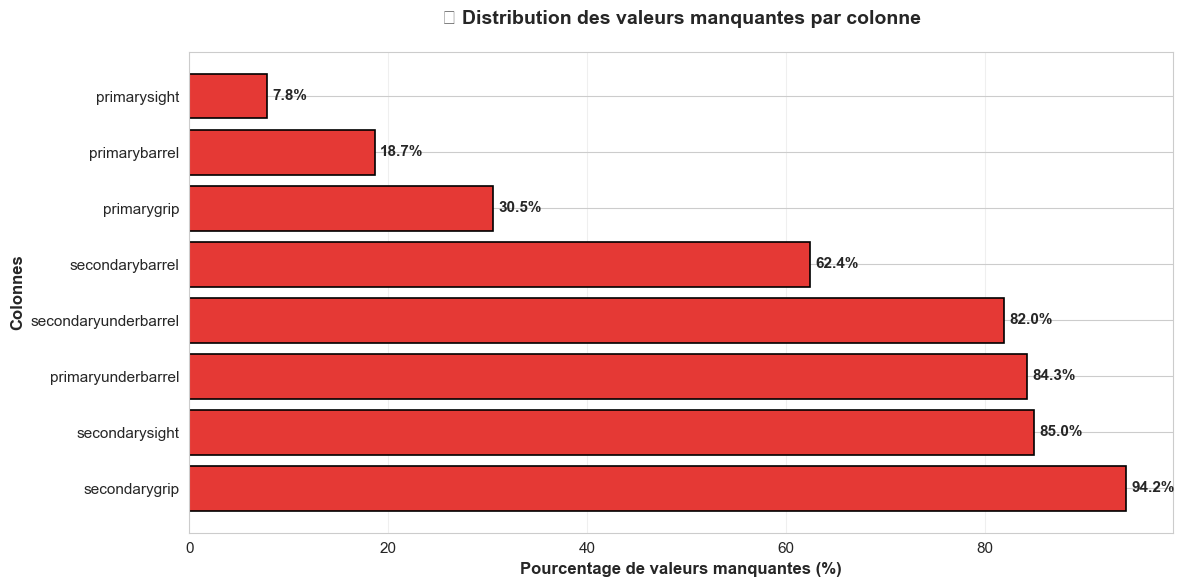

In [12]:
# ═══════════════════════════════════════════════════════════════════════════
# 📊 VISUALISATION DES VALEURS MANQUANTES
# ═══════════════════════════════════════════════════════════════════════════

if len(missing_df_filtered) > 0:
    fig, ax = plt.subplots(figsize=(12, max(6, len(missing_df_filtered) * 0.4)))
    
    # Graphique en barres horizontales
    bars = ax.barh(
        missing_df_filtered['Colonne'], 
        missing_df_filtered['Pourcentage'],
        color=COLORS['danger'],
        edgecolor='black',
        linewidth=1.2
    )
    
    # Ajouter les valeurs sur les barres
    for i, (bar, pct) in enumerate(zip(bars, missing_df_filtered['Pourcentage'])):
        ax.text(
            bar.get_width() + 0.5, 
            bar.get_y() + bar.get_height()/2,
            f'{pct:.1f}%',
            va='center',
            fontweight='bold'
        )
    
    ax.set_xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Colonnes', fontsize=12, fontweight='bold')
    ax.set_title('🔍 Distribution des valeurs manquantes par colonne', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ Pas de visualisation nécessaire : aucune valeur manquante !")

In [13]:
# ═══════════════════════════════════════════════════════════════════════════
# 🔄 DÉTECTION DES DOUBLONS
# ═══════════════════════════════════════════════════════════════════════════

n_duplicates = df.duplicated().sum()
duplicate_pct = (n_duplicates / len(df)) * 100

print("="*80)
print("🔄 ANALYSE DES DOUBLONS")
print("="*80)

if n_duplicates > 0:
    print(f"\n⚠️  {n_duplicates:,} lignes dupliquées détectées ({duplicate_pct:.2f}%)")
    print(f"📊 {len(df) - n_duplicates:,} lignes uniques")
else:
    print("\n✅ Aucun doublon détecté !")

print("="*80)

🔄 ANALYSE DES DOUBLONS

⚠️  3 lignes dupliquées détectées (0.00%)
📊 99,997 lignes uniques


---

## 7️⃣ Analyses statistiques {#stats}

Analyses statistiques approfondies des données.

In [14]:
# ═══════════════════════════════════════════════════════════════════════════
# 📈 STATISTIQUES DESCRIPTIVES
# ═══════════════════════════════════════════════════════════════════════════

print("="*80)
print("📈 STATISTIQUES DESCRIPTIVES (Colonnes numériques)")
print("="*80)
print()

df.describe()

📈 STATISTIQUES DESCRIPTIVES (Colonnes numériques)



,dateid,matchid,roundnumber,roundduration,clearancelevel,team,haswon,nbkills,isdead
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,20170212.00,1672892610.20,3.52,185.73,92.64,0.50,0.51,0.70,0.70
std,0.00,86370592.98,2.00,46.48,46.08,0.50,0.50,0.92,0.46
min,20170212.00,1522380841.00,1.00,6.00,0.00,0.00,0.00,0.00,0.00
25%,20170212.00,1599128881.00,2.00,155.00,58.00,0.00,0.00,0.00,0.00
50%,20170212.00,1673411641.00,3.00,188.00,89.00,0.00,1.00,0.00,1.00
75%,20170212.00,1748844901.00,5.00,222.00,123.00,1.00,1.00,1.00,1.00
max,20170212.00,1817583741.00,9.00,2538.00,331.00,1.00,1.00,6.00,1.00


---

## 8️⃣ Visualisations {#viz}

Visualisations des distributions et corrélations.

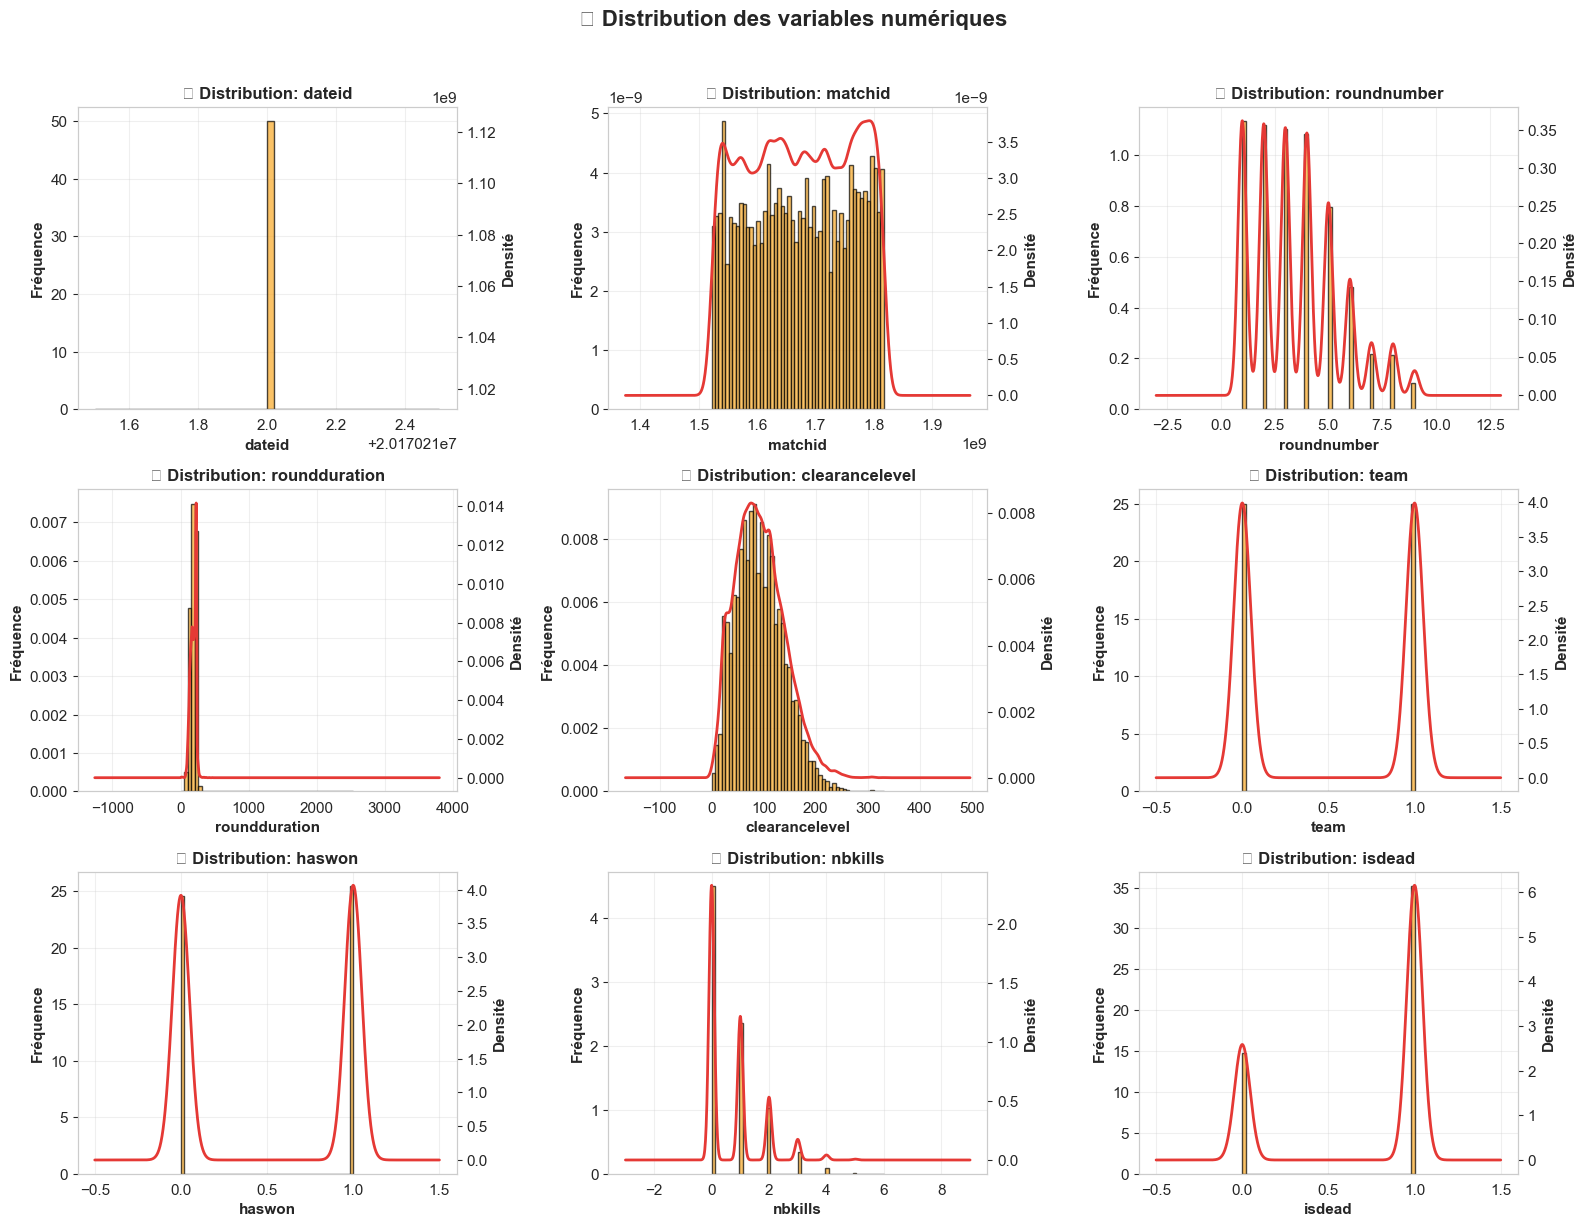

In [15]:
# ═══════════════════════════════════════════════════════════════════════════
# 📊 DISTRIBUTION DES VARIABLES NUMÉRIQUES
# ═══════════════════════════════════════════════════════════════════════════

if len(num_cols) > 0:
    # Limiter à 9 premières colonnes pour la lisibilité
    cols_to_plot = num_cols[:min(9, len(num_cols))]
    n_cols = 3
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    axes = axes.flatten() if len(cols_to_plot) > 1 else [axes]
    
    for i, col in enumerate(cols_to_plot):
        # Histogramme avec KDE
        axes[i].hist(df[col].dropna(), bins=50, color=COLORS['primary'], 
                     alpha=0.7, edgecolor='black', density=True)
        
        # Ajouter une courbe KDE
        df[col].dropna().plot(kind='density', ax=axes[i], color=COLORS['danger'], 
                              linewidth=2, secondary_y=True)
        
        axes[i].set_title(f'📊 Distribution: {col}', fontweight='bold', fontsize=12)
        axes[i].set_xlabel(col, fontweight='bold')
        axes[i].set_ylabel('Fréquence', fontweight='bold')
        axes[i].grid(alpha=0.3)
        axes[i].right_ax.set_ylabel('Densité', fontweight='bold')
    
    # Masquer les axes vides
    for j in range(len(cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('🎯 Distribution des variables numériques', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Aucune colonne numérique à visualiser")

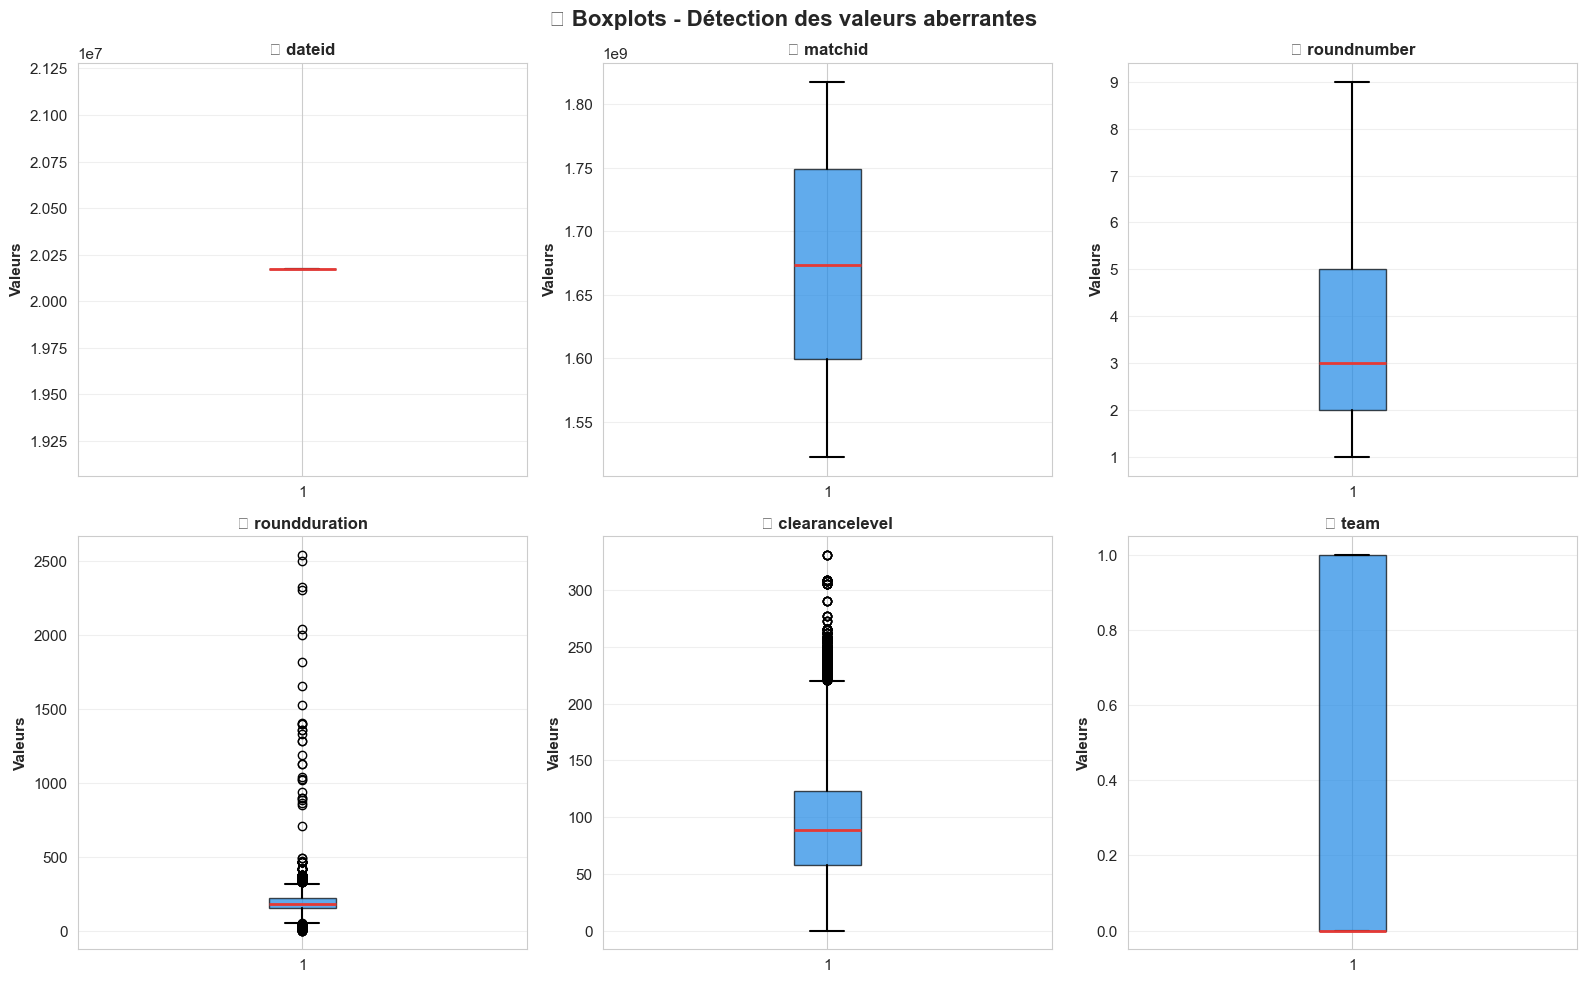

In [16]:
# ═══════════════════════════════════════════════════════════════════════════
# 📦 BOXPLOTS (Détection des outliers)
# ═══════════════════════════════════════════════════════════════════════════

if len(num_cols) > 0:
    cols_to_plot = num_cols[:min(6, len(num_cols))]
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(cols_to_plot):
        bp = axes[i].boxplot(df[col].dropna(), patch_artist=True,
                             boxprops=dict(facecolor=COLORS['info'], alpha=0.7),
                             medianprops=dict(color=COLORS['danger'], linewidth=2),
                             whiskerprops=dict(color='black', linewidth=1.5),
                             capprops=dict(color='black', linewidth=1.5))
        
        axes[i].set_title(f'📦 {col}', fontweight='bold', fontsize=12)
        axes[i].set_ylabel('Valeurs', fontweight='bold')
        axes[i].grid(alpha=0.3, axis='y')
    
    # Masquer les axes vides
    for j in range(len(cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('📦 Boxplots - Détection des valeurs aberrantes', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

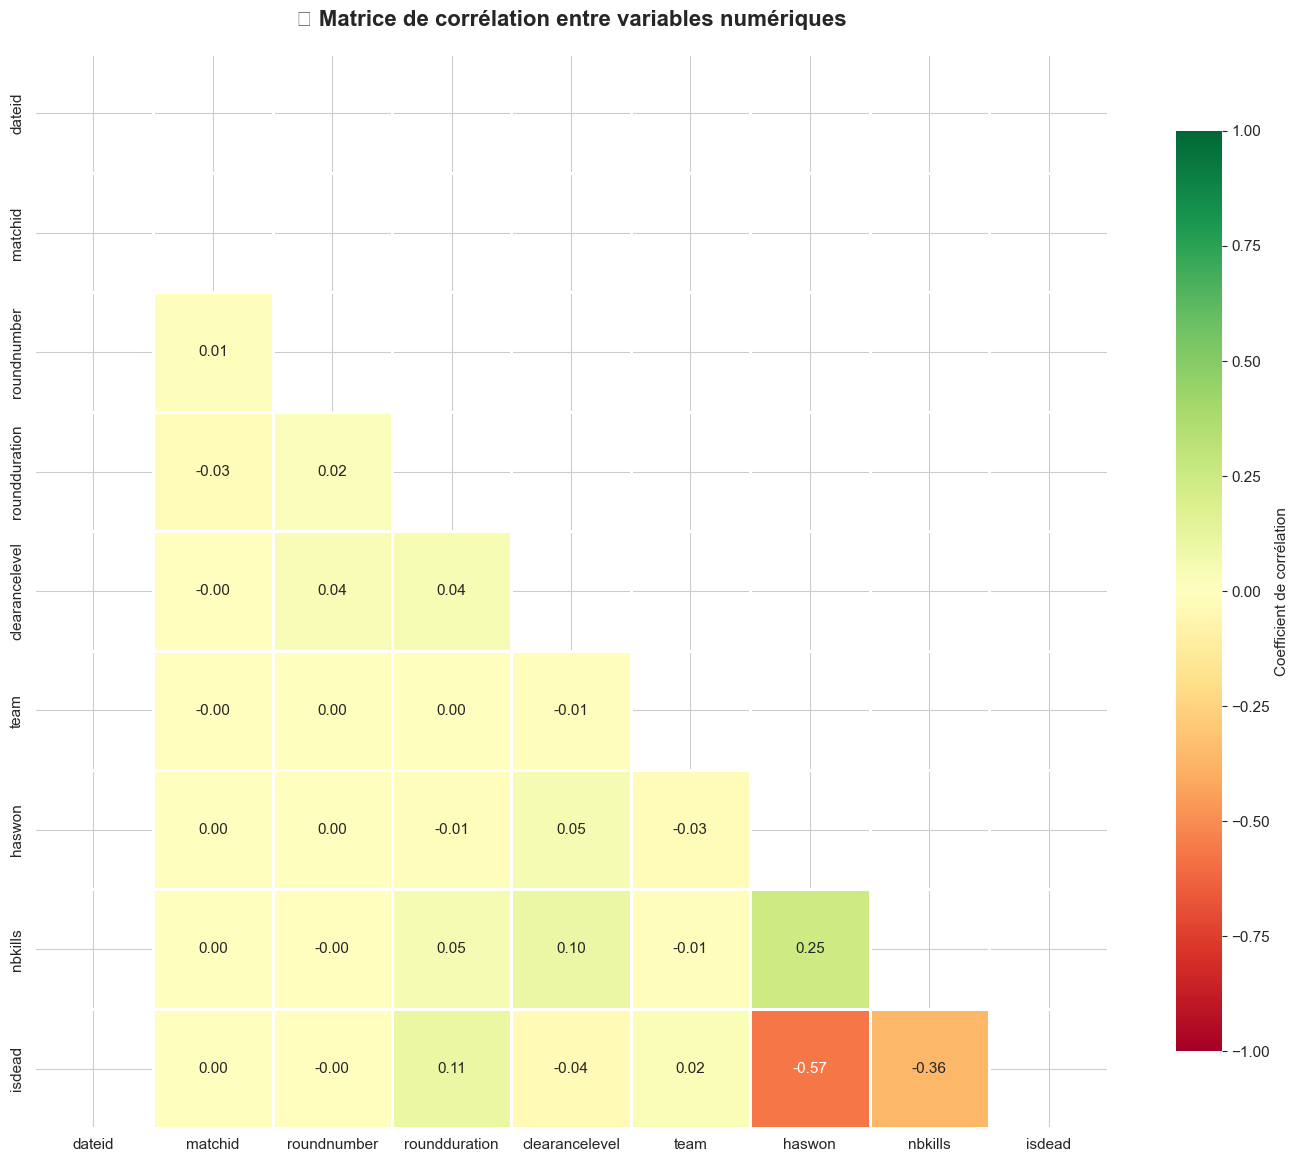


🔍 CORRÉLATIONS FORTES (|r| > 0.7)

✅ Aucune corrélation forte détectée


In [17]:
# ═══════════════════════════════════════════════════════════════════════════
# 🔗 MATRICE DE CORRÉLATION
# ═══════════════════════════════════════════════════════════════════════════

if len(num_cols) > 1:
    # Calculer la matrice de corrélation
    corr_matrix = df[num_cols].corr()
    
    # Créer le heatmap
    plt.figure(figsize=(14, 12))
    
    # Masque pour le triangle supérieur (optionnel, plus lisible)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap='RdYlGn',
        center=0,
        square=True,
        linewidths=1,
        cbar_kws={"shrink": 0.8, "label": "Coefficient de corrélation"},
        vmin=-1,
        vmax=1
    )
    
    plt.title('🔗 Matrice de corrélation entre variables numériques', 
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Identifier les corrélations fortes
    print("\n" + "="*80)
    print("🔍 CORRÉLATIONS FORTES (|r| > 0.7)")
    print("="*80)
    
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                strong_corr.append({
                    'Variable 1': corr_matrix.columns[i],
                    'Variable 2': corr_matrix.columns[j],
                    'Corrélation': corr_matrix.iloc[i, j]
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr).sort_values('Corrélation', 
                                                                ascending=False, 
                                                                key=abs)
        print(strong_corr_df.to_string(index=False))
    else:
        print("\n✅ Aucune corrélation forte détectée")
    
    print("="*80)
else:
    print("⚠️  Pas assez de colonnes numériques pour calculer les corrélations")

---

## 9️⃣ Conclusions et recommandations {#conclusions}

Synthèse de l'analyse exploratoire et prochaines étapes.

In [18]:
# ═══════════════════════════════════════════════════════════════════════════
# 📋 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE
# ═══════════════════════════════════════════════════════════════════════════

print("="*80)
print("📊 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE")
print("="*80)

print(f"""
📏 DIMENSIONS
   ├─ Lignes: {len(df):,}
   └─ Colonnes: {len(df.columns)}

📂 TYPES DE COLONNES
   ├─ Numériques: {len(num_cols)}
   └─ Catégorielles: {len(cat_cols)}

❓ QUALITÉ DES DONNÉES
   ├─ Valeurs manquantes: {missing.sum():,} ({(missing.sum() / df.size * 100):.2f}%)
   ├─ Doublons: {n_duplicates:,} ({duplicate_pct:.2f}%)
   └─ Mémoire utilisée: {memory_usage:.2f} MB

🎯 PROCHAINES ÉTAPES
   ✅ 1. Nettoyage des données (valeurs manquantes, doublons)
   ✅ 2. Feature engineering (création de nouvelles variables)
   ✅ 3. Création du schéma SQL
   ✅ 4. Import dans MySQL
   ✅ 5. Visualisations Power BI
""")

print("="*80)

📊 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE

📏 DIMENSIONS
   ├─ Lignes: 100,000
   └─ Colonnes: 31

📂 TYPES DE COLONNES
   ├─ Numériques: 9
   └─ Catégorielles: 22

❓ QUALITÉ DES DONNÉES
   ├─ Valeurs manquantes: 464,912 (15.00%)
   ├─ Doublons: 3 (0.00%)
   └─ Mémoire utilisée: 117.03 MB

🎯 PROCHAINES ÉTAPES
   ✅ 1. Nettoyage des données (valeurs manquantes, doublons)
   ✅ 2. Feature engineering (création de nouvelles variables)
   ✅ 3. Création du schéma SQL
   ✅ 4. Import dans MySQL
   ✅ 5. Visualisations Power BI



---

## 💾 Sauvegarde des insights

Sauvegarde des principales statistiques pour référence.

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# 💾 SAUVEGARDE DES STATISTIQUES
# ═══════════════════════════════════════════════════════════════════════════

# # Créer le dossier processed s'il n'existe pas
# processed_path = Path("../data/processed")
# processed_path.mkdir(exist_ok=True)

# # Sauvegarder les statistiques descriptives
# stats_summary = df.describe()
# stats_summary.to_csv(processed_path / "stats_summary.csv")

# # Sauvegarder le rapport des valeurs manquantes
# if len(missing_df_filtered) > 0:
#     missing_df_filtered.to_csv(processed_path / "missing_values_report.csv", index=False)

# # Sauvegarder les informations sur les colonnes
# col_info = pd.DataFrame({
#     'Colonne': df.columns,
#     'Type': df.dtypes.values,
#     'Non_null': df.count().values,
#     'Null': df.isnull().sum().values,
#     'Unique': df.nunique().values
# })
# col_info.to_csv(processed_path / "columns_info.csv", index=False)

# print("✅ Statistiques sauvegardées dans data/processed/")
# print("   ├─ stats_summary.csv")
# print("   ├─ missing_values_report.csv")
# print("   └─ columns_info.csv")